<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-130/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Semana 4: Ciencia y Análisis de Datos

##Nombre: Francisco Javier Ramírez Arias 
##Matricula: A01316379
##Nombre: Jesús Angel Rincón Ruiz
##Matricula: A01793960

In [ ]:
#Se cargan diferentes librerias para llevar a cabo el análisis de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Parte 1: Ejercicio Guiado
* Determine el número de mínimo de componente principales que representa la mayor parte de la variación en sus datos
 * Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.
* Interprete cada componente principal en términos de las variables originales
 * Examine la magnitud y la direccion de los coeficientes de las variables originales.
* Identifique valores atípicos
  * Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [ ]:
df = pd.read_csv(path, index_col = 0)
df.index.name = None #Eliminamos la columna Index ya que nuestro dataframe ya cuenta con su columna ID
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
#Iniciamos con la limpieza de datos
#continuamos con la estrategia de limpieza de datos utilizada en la Actividad 3 en la cual se utilizo este mismo D

In [ ]:
#Copia de la base de datos
drop = ['Y']
#ndf
#ndf.drop(columns = drop, inplace = True)

ndf = df.copy()

ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
#Llenamos cada columna de la base de datos con la estrategia seleccionada (mean)

In [ ]:
#confirmamos que no tenemos datos faltantes
ndf.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
dtype: bool

# **Normalización de los datos**

In [ ]:
#eliminamos las columnas categoricas como lo son (X2: Gender, X3: Education, X4: Marital status, X6 - X11: History of past payment)

In [ ]:
ndf.columns
ndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
#se calcula correlación
ndf.corr()

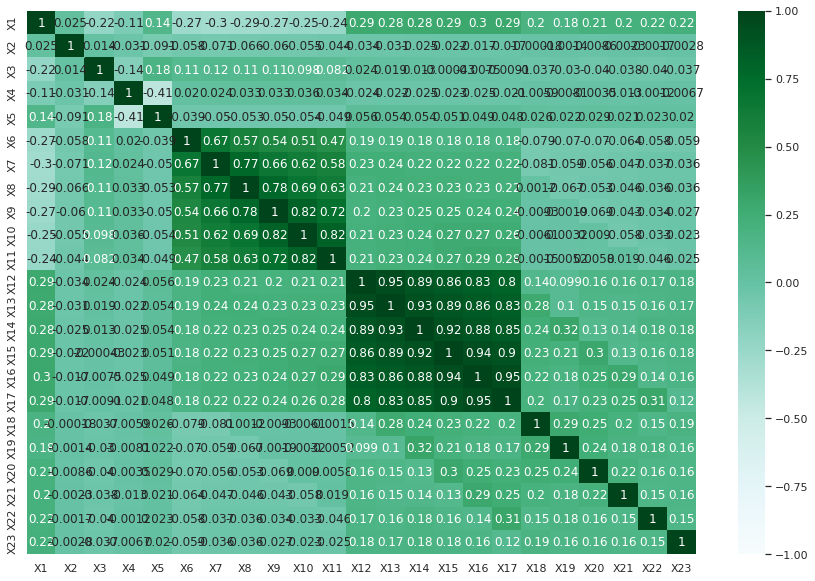

In [ ]:
corrs = ndf.corr()

sns.set(rc = {"figure.figsize": (15,10)})
sns.heatmap(corrs, vmin = -1, vmax =1, cmap = "BuGn", annot = True)

**Normalización Min - Max**
scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)
scaled

array([[-1.13672015,  0.81012666,  0.18593186, ..., -0.30808663,
        -0.3141435 , -0.29340185],
       [-0.3659805 ,  0.81012666,  0.18593186, ..., -0.24426427,
        -0.3141435 , -0.18090675],
       [-0.59720239,  0.81012666,  0.18593186, ..., -0.24426427,
        -0.24870099, -0.01216409],
       ...,
       [-1.05964618, -1.23437488,  0.18593186, ..., -0.04003273,
        -0.18325848, -0.11903444],
       [-0.67427636, -1.23437488,  1.45126397, ..., -0.18516477,
         3.15195364, -0.19193127],
       [-0.90549825, -1.23437488,  0.18593186, ..., -0.24426427,
        -0.24870099, -0.2371543 ]])

In [ ]:
scaled[:5]

array([[-1.13672015,  0.81012666,  0.18593186, -1.05736968, -1.24586411,
         1.7944621 ,  1.78218212, -0.6969691 , -0.66647708, -1.52977346,
        -1.48582085, -0.64260318, -0.64747557, -0.66805862, -0.67256256,
        -0.66313396, -0.65280267, -0.34188504, -0.22711057, -0.29677335,
        -0.30808663, -0.3141435 , -0.29340185],
       [-0.3659805 ,  0.81012666,  0.18593186,  0.85849017, -1.02889425,
        -0.87502757,  1.78218212,  0.13913178,  0.18885751,  0.23501925,
         1.99209367, -0.65931873, -0.6668203 , -0.63932436, -0.62171122,
        -0.60631669, -0.59805145, -0.34188504, -0.21361453, -0.2399814 ,
        -0.24426427, -0.3141435 , -0.18090675],
       [-0.59720239,  0.81012666,  0.18593186,  0.85849017, -0.16101485,
         0.01480232,  0.11166485,  0.13913178,  0.18885751,  0.23501925,
         0.25313641, -0.29870547, -0.49399619, -0.4825042 , -0.4498393 ,
        -0.41731497, -0.3917396 , -0.2502399 , -0.19191671, -0.2399814 ,
        -0.24426427, -0.2487

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=ndf.columns)
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,0.810127,0.185932,-1.05737,-1.245864,1.794462,1.782182,-0.696969,-0.666477,-1.529773,...,-0.668059,-0.672563,-0.663134,-0.652803,-0.341885,-0.227111,-0.296773,-0.308087,-0.314144,-0.293402
1,-0.365981,0.810127,0.185932,0.85849,-1.028894,-0.875028,1.782182,0.139132,0.188858,0.235019,...,-0.639324,-0.621711,-0.606317,-0.598051,-0.341885,-0.213615,-0.239981,-0.244264,-0.314144,-0.180907
2,-0.597202,0.810127,0.185932,0.85849,-0.161015,0.014802,0.111665,0.139132,0.188858,0.235019,...,-0.482504,-0.449839,-0.417315,-0.391740,-0.250240,-0.191917,-0.239981,-0.244264,-0.248701,-0.012164
3,-0.905498,0.810127,0.185932,-1.05737,0.164440,0.014802,0.111665,0.139132,0.188858,0.235019,...,0.032665,-0.232524,-0.186905,-0.156717,-0.221140,-0.169394,-0.228623,-0.237882,-0.244185,-0.237154
4,-0.905498,-1.234375,0.185932,-1.05737,2.334138,-0.875028,0.111665,-0.696969,0.188858,0.235019,...,-0.161338,-0.347126,-0.348279,-0.331599,-0.221140,1.334785,0.271146,0.266315,-0.269054,-0.255210


In [ ]:
cols = ["X1", "X2", "X3"]
summary = {
"Varianzas": scaled_df[cols].var()[0:3],
"Valor Min": scaled_df[cols].min()[0:3],
"Valor Max": scaled_df[cols].max()[0:3]
}
pd.DataFrame(summary, index = cols).transpose()


,X1,X2,X3
Varianzas,1.000033,1.000033,1.000033
Valor Min,-1.213794,-1.234375,-2.344732
Valor Max,6.416528,0.810127,5.247260


**Principal component**

In [ ]:
pcs =PCA()
pcs_t = pcs.fit_transform(scaled_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)*100
                             })
#pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.558529,0.284550,28.454961
1,2.024028,0.178078,46.262756
2,1.245500,0.067432,53.005934
3,1.213249,0.063985,59.404416
4,1.012751,0.044584,63.862851
5,0.978423,0.041613,68.024168
6,0.953093,0.039486,71.972809
7,0.942648,0.038626,75.835377
8,0.933877,0.037910,79.626404
9,0.885312,0.034070,83.033384


In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.558529,0.284550,28.454961
PC2,2.024028,0.178078,46.262756
PC3,1.245500,0.067432,53.005934
PC4,1.213249,0.063985,59.404416
PC5,1.012751,0.044584,63.862851
PC6,0.978423,0.041613,68.024168
PC7,0.953093,0.039486,71.972809
PC8,0.942648,0.038626,75.835377
PC9,0.933877,0.037910,79.626404
PC10,0.885312,0.034070,83.033384


In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  23.00076690676152
Varianza total de los componentes:  23.00502370963821


In [ ]:
pcsSummary_df


,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.558529,0.284550,28.454961
PC2,2.024028,0.178078,46.262756
PC3,1.245500,0.067432,53.005934
PC4,1.213249,0.063985,59.404416
PC5,1.012751,0.044584,63.862851
PC6,0.978423,0.041613,68.024168
PC7,0.953093,0.039486,71.972809
PC8,0.942648,0.038626,75.835377
PC9,0.933877,0.037910,79.626404
PC10,0.885312,0.034070,83.033384


In [ ]:
total_var =scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})


,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.347826,4.347826
X2,4.347826,8.695652
X3,4.347826,13.043478
X4,4.347826,17.391304
X5,4.347826,21.739130
X6,4.347826,26.086956
X7,4.347826,30.434782
X8,4.347826,34.782608
X9,4.347826,39.130435
X10,4.347826,43.478261


In [ ]:
comps_df = pd.DataFrame(pcs.components_.round(4), columns = pcs_df.columns, index = scaled_df.columns) 
comps_df.iloc[:,:19]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
X1,0.0685,-0.0217,0.0192,-0.0056,0.0143,0.1611,0.1941,0.2002,0.2070,0.2109,0.2063,0.3344,0.3458,0.3498,0.3539,0.3518,0.3445,0.0942,0.0787
X2,0.3164,0.0305,-0.0916,-0.0432,0.0666,-0.2982,-0.3349,-0.3438,-0.3446,-0.3316,-0.3058,0.1398,0.1402,0.1462,0.1454,0.1437,0.1418,0.1491,0.1399
X3,0.0174,0.0240,-0.3161,0.4528,-0.4621,-0.0174,0.0179,0.0616,0.0890,0.1088,0.1110,-0.1510,-0.1271,-0.0840,-0.0706,-0.0566,-0.0476,0.2822,0.3021
X4,0.0699,-0.0778,0.2469,-0.4450,0.4631,0.0161,0.0499,0.0840,0.1093,0.1156,0.1098,-0.1678,-0.1492,-0.1047,-0.1006,-0.0887,-0.0840,0.2800,0.3109
X5,-0.1491,0.8843,0.3646,-0.0533,-0.1640,-0.0348,-0.0373,-0.0235,-0.0076,0.0018,0.0122,-0.0131,0.0047,0.0299,0.0227,0.0224,0.0105,0.0928,0.1075
X6,-0.3757,-0.3950,0.5657,0.2796,-0.0888,-0.0397,-0.0609,-0.0699,-0.0874,-0.0871,-0.0914,0.0176,0.0551,0.0854,0.0641,0.0250,-0.0214,0.2384,0.2560
X7,0.1059,0.0646,-0.3994,-0.1596,0.0813,-0.0868,-0.0921,-0.0214,0.0394,0.1040,0.1391,-0.0654,-0.0145,-0.0033,0.0659,0.0802,-0.0496,0.2028,0.1044
X8,-0.0593,-0.0273,0.0808,0.0262,-0.0128,0.0216,0.0157,-0.0264,-0.0562,-0.0340,0.0467,-0.0228,-0.0760,-0.1259,-0.0369,0.1131,0.1633,-0.2670,-0.2190
X9,0.0216,0.0189,-0.1548,-0.0559,0.0467,-0.0305,-0.0334,-0.0115,0.0444,0.0545,-0.0007,-0.0646,-0.0457,0.0797,0.0266,-0.0695,0.0807,0.0363,0.3936
X10,0.0175,0.0243,0.0625,0.0386,0.0081,0.0032,0.0065,-0.0248,-0.0568,0.0668,0.0142,0.0115,-0.0369,-0.1222,0.1235,-0.0055,0.0138,-0.2363,-0.2788


In [ ]:
comps_df.iloc[:,:19].abs().idxmax()


PC1     X14
PC2      X5
PC3      X6
PC4     X13
PC5     X13
PC6     X12
PC7     X16
PC8     X18
PC9     X16
PC10    X19
PC11    X16
PC12    X17
PC13    X23
PC14    X23
PC15    X20
PC16    X22
PC17    X20
PC18    X11
PC19    X11
dtype: object

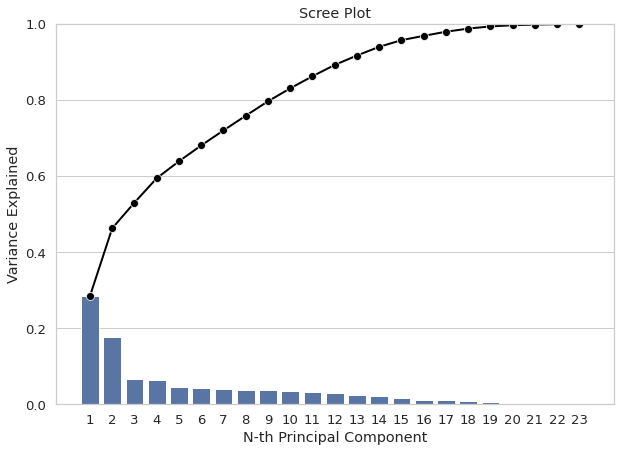

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

#Parte 2: Responda las siguientes preguntas



1.   ¿Cuál es el número de componentes mínimo y porqué? Para nuestro caso en particular, considero que el numero de componentes principales minimo se encontraria entre 2 y 3. Principalmente debido a que el analisis de componentes principales es extremadamente util ppara la visualización de datos y la visualización de datos con varias dimensiones puede ser posible con PCA.
2.   ¿Cuál es la variación de los datos que representan esos componentes?
Los componentes principales son nuevas variables construidas a ppartir de las ccombinaciones lineales o mezclas de las variables iniciales. Las combinaciones son llevadas de tal forma que las nuevas variables no esten correlacionasdas y la mayoria de las información de las variables iciniales se encunetre contenida dentro de los primeros componentes. CComo ejemplo, contamos con datos de 8 dimensiones, del cual obtenemos 8 componentes principales, pero PCA trata de maximinar la mayor cantidad de información posible en el primer componente, despues de maximizar la información remanente en el segundo componente y asi sucecivamente.
3.   ¿Cuál es la pérdida de información después de realizar PCA?

4.    De las variables originales, ¿Cuál tienen mayor y cuál menor importancia en los componentes principales?

5. ¿Cuándo se recomienda realizar un PCA y que beneficios ofrece para Machine Learning? El analisis de componentes principales se recomienda utilizar para obtener relaciones entre variables y relaciones entre muestras, permite detectar valores atipicos, permite encontrar patrones y cuantificarlos,así como generar nuevas hipotesis. El analissis de componentes principales es comunmente realizado dentro de la etapa de preprocesamiento, lo que permite obtener un conjunto de datos más compacto. Es comun utilizar estos componentes en la validación cruzada dentro del entrenemiento de un modelo de clasificación. Sin aembargo el uso de este enfoque en clasificación es cuestionable en ocasiones. Por ejemplo, la validación cruzada nos menciona que algunos compontes son validos, pero resulta que otros componentes permiten mejorar la clasificación. Esto debido a que cierta información es retenida por el analisis de componentes principales. Sin embargo el uso PCA dentro de clasificación nos permite